<a href="https://colab.research.google.com/github/willfinnigan/kinetics/blob/master/examples/Simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the required modules
%%capture
!pip install kinetics

In [0]:
# Install the required modules
import kinetics
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [0]:
# Define reactions
enzyme_1 = kinetics.Uni(kcat='enz1_kcat', kma='enz1_km', enz='enz_1', a='A',
                        substrates=['A'], products=['B'])

enzyme_1.parameters = {'enz1_kcat' : 200,
                       'enz1_km' : 8000}

enzyme_2 = kinetics.Uni(kcat='enz2_kcat', kma='enz2_km', enz='enz_2', a='B',
                        substrates=['B'], products=['C'])

enzyme_2.parameters = {'enz2_kcat' : 30,
                       'enz2_km' : 2000}

# Set up the model
model = kinetics.Model(logging=False)
model.append(enzyme_1)
model.append(enzyme_2)
model.set_time(0, 120, 1000) # 120 mins, 1000 timepoints.

# Set starting concentrations
model.species = {"A" : 10000,
                 "enz_1" : 4,
                 "enz_2" : 10}
model.setup_model()

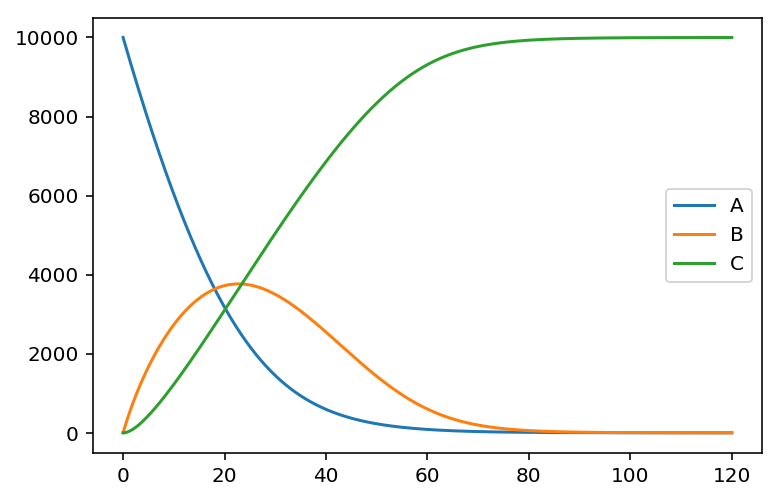

In [4]:
# Run and plot the model
model.run_model()
model.plot_substrate('A')
model.plot_substrate('B')
model.plot_substrate('C', plot=True)